# SALARIES BY COLLEGE MAJOR — EARNINGS, RISK & CAREER POTENTIAL

A concise analysis of starting and mid-career salaries by U.S. college major, focusing on earnings, risk (spread), and potential.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

## Load the dataset

In [2]:
df = pd.read_csv('salaries_by_college_major.csv')
print('Columns:', list(df.columns))
df.head()

Columns: ['Undergraduate Major', 'Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 90th Percentile Salary', 'Group']


,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
0,Accounting,"46,000.00","77,100.00","42,200.00","152,000.00",Business
1,Aerospace Engineering,"57,700.00","101,000.00","64,300.00","161,000.00",STEM
2,Agriculture,"42,600.00","71,900.00","36,300.00","150,000.00",Business
3,Anthropology,"36,800.00","61,500.00","33,800.00","138,000.00",HASS
4,Architecture,"41,600.00","76,800.00","50,600.00","136,000.00",Business


## Quick data check

In [3]:
print('Shape:', df.shape)
print('\nMissing values per column:\n', df.isna().sum())

Shape: (51, 6)

Missing values per column:
 Undergraduate Major                  0
Starting Median Salary               1
Mid-Career Median Salary             1
Mid-Career 10th Percentile Salary    1
Mid-Career 90th Percentile Salary    1
Group                                1
dtype: int64


## Clean and ensure numeric types
Coerce the money columns to numeric and drop rows with missing values in key fields.


In [4]:
cols_money = [
    'Starting Median Salary',
    'Mid-Career Median Salary',
    'Mid-Career 10th Percentile Salary',
    'Mid-Career 90th Percentile Salary',
]

for c in cols_money:
    df[c] = pd.to_numeric(df[c], errors='coerce')

clean_df = df.dropna(subset=['Undergraduate Major'] + cols_money).copy()
clean_df.tail()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Group
45,Political Science,"40,800.00","78,200.00","41,200.00","168,000.00",HASS
46,Psychology,"35,900.00","60,400.00","31,600.00","127,000.00",HASS
47,Religion,"34,100.00","52,000.00","29,700.00","96,400.00",HASS
48,Sociology,"36,500.00","58,200.00","30,700.00","118,000.00",HASS
49,Spanish,"34,000.00","53,100.00","31,000.00","96,400.00",HASS


## Key questions

In [5]:
# Highest starting salary
idx_start_max = clean_df['Starting Median Salary'].idxmax()
clean_df.loc[idx_start_max, ['Undergraduate Major', 'Starting Median Salary']]

Undergraduate Major       Physician Assistant
Starting Median Salary              74,300.00
Name: 43, dtype: object

In [6]:
# Highest mid-career salary
idx_mid_max = clean_df['Mid-Career Median Salary'].idxmax()
clean_df.loc[idx_mid_max, ['Undergraduate Major', 'Mid-Career Median Salary']]

Undergraduate Major         Chemical Engineering
Mid-Career Median Salary              107,000.00
Name: 8, dtype: object

In [7]:
# Lowest starting salary
idx_start_min = clean_df['Starting Median Salary'].idxmin()
clean_df.loc[idx_start_min, ['Undergraduate Major', 'Starting Median Salary']]

Undergraduate Major        Spanish
Starting Median Salary   34,000.00
Name: 49, dtype: object

In [8]:
# Lowest mid-career salary
idx_mid_min = clean_df['Mid-Career Median Salary'].idxmin()
clean_df.loc[idx_mid_min, ['Undergraduate Major', 'Mid-Career Median Salary']]

Undergraduate Major         Education
Mid-Career Median Salary    52,000.00
Name: 18, dtype: object

## Salary spread (risk vs reward)
Spread = 90th percentile − 10th percentile. Smaller spread ⇒ lower risk/variance.


In [9]:
clean_df = clean_df.assign(
    Spread = clean_df['Mid-Career 90th Percentile Salary'] - clean_df['Mid-Career 10th Percentile Salary']
)
clean_df[['Undergraduate Major', 'Spread']].head()

,Undergraduate Major,Spread
0,Accounting,"109,800.00"
1,Aerospace Engineering,"96,700.00"
2,Agriculture,"113,700.00"
3,Anthropology,"104,200.00"
4,Architecture,"85,400.00"


## Lowest spread majors (lower variance)

In [10]:
low_risk = clean_df.sort_values('Spread', ascending=True)
low_risk[['Undergraduate Major', 'Spread']].head(10)

,Undergraduate Major,Spread
40,Nursing,"50,700.00"
43,Physician Assistant,"57,600.00"
41,Nutrition,"65,300.00"
49,Spanish,"65,400.00"
27,Health Care Administration,"66,400.00"
47,Religion,"66,700.00"
23,Forestry,"70,000.00"
32,Interior Design,"71,300.00"
18,Education,"72,700.00"
15,Criminal Justice,"74,800.00"


## Highest potential majors (by 90th percentile)

In [11]:
highest_potential = clean_df.sort_values('Mid-Career 90th Percentile Salary', ascending=False)
highest_potential[['Undergraduate Major', 'Mid-Career 90th Percentile Salary']].head(10)

,Undergraduate Major,Mid-Career 90th Percentile Salary
17,Economics,"210,000.00"
22,Finance,"195,000.00"
8,Chemical Engineering,"194,000.00"
37,Math,"183,000.00"
44,Physics,"178,000.00"
36,Marketing,"175,000.00"
30,Industrial Engineering,"173,000.00"
14,Construction,"171,000.00"
42,Philosophy,"168,000.00"
19,Electrical Engineering,"168,000.00"


## Highest spread majors (higher variance)

In [12]:
high_risk = clean_df.sort_values('Spread', ascending=False)
high_risk[['Undergraduate Major', 'Spread']].head(10)

,Undergraduate Major,Spread
17,Economics,"159,400.00"
22,Finance,"147,800.00"
37,Math,"137,800.00"
36,Marketing,"132,900.00"
42,Philosophy,"132,500.00"
45,Political Science,"126,800.00"
8,Chemical Engineering,"122,100.00"
44,Physics,"122,000.00"
33,International Relations,"118,800.00"
16,Drama,"116,300.00"


## Group averages
Average salaries and spread by Group.


In [13]:
group_summary = (clean_df
                 .groupby('Group', as_index=False)[cols_money + ['Spread']]
                 .mean(numeric_only=True)
                 .sort_values('Mid-Career Median Salary', ascending=False))
group_summary

,Group,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 90th Percentile Salary,Spread
2,STEM,"53,862.50","90,812.50","56,025.00","157,625.00","101,600.00"
0,Business,"44,633.33","75,083.33","43,566.67","147,525.00","103,958.33"
1,HASS,"37,186.36","62,968.18","34,145.45","129,363.64","95,218.18"


## Visualizations

### Top 10 Majors by Starting Median Salary

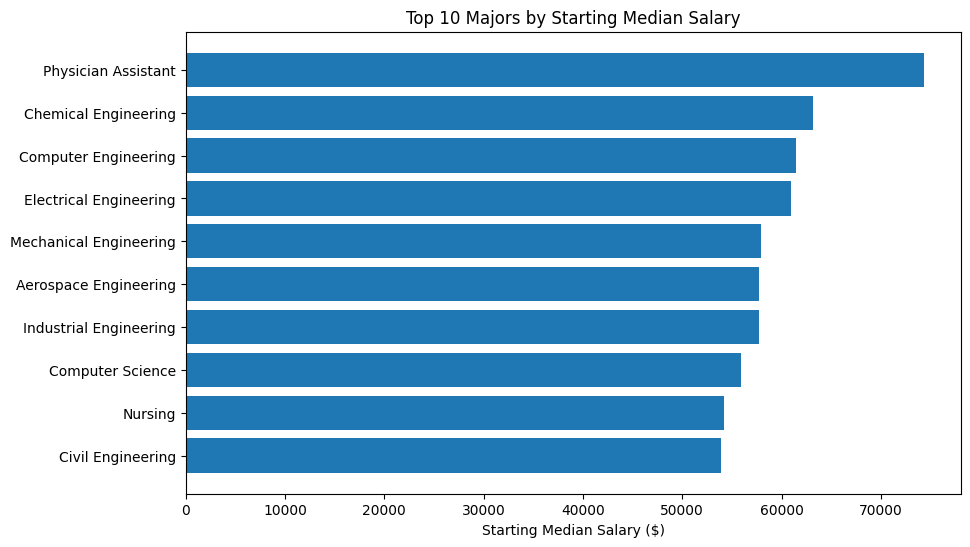

In [14]:
top_start = clean_df.sort_values('Starting Median Salary', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_start['Undergraduate Major'], top_start['Starting Median Salary'])
plt.xlabel('Starting Median Salary ($)')
plt.title('Top 10 Majors by Starting Median Salary')
plt.gca().invert_yaxis()
plt.show()

### Distribution of Salary Spread (P90 − P10)

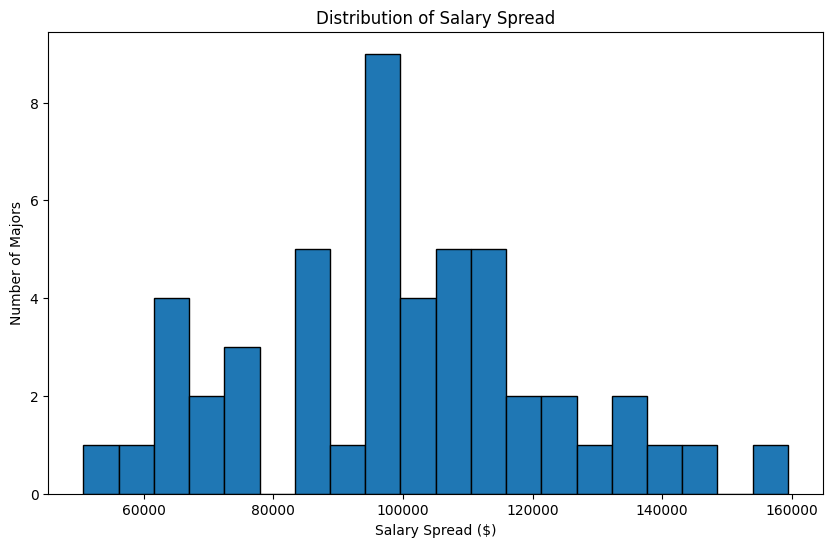

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(clean_df['Spread'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Salary Spread ($)')
plt.ylabel('Number of Majors')
plt.title('Distribution of Salary Spread')
plt.show()